In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("/Users/carlbechtolsheim/code/Niki827/watt_squad/raw_data/train.csv")

In [17]:
# Converting time to datetime
data['time']= pd.to_datetime(data['time'])

In [18]:
#creating columns indicating the hour and the month
data['hour'] = data['time'].dt.hour
data['month'] = data['time'].dt.month

In [19]:
#creating column indicating the season
def assign_season(month):
    if month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    elif month in [9, 10, 11]:
        return 3  # Fall
    else:  # December, January, February
        return 4  # Winter

data['season'] = data['month'].apply(assign_season)    

In [20]:
#Creating columns considering cyclical patterns
data['hour_sine'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cosine'] = np.cos(2 * np.pi * data['hour'] / 24)

data['month_sine'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cosine'] = np.cos(2 * np.pi * data['month'] / 12)

data['season_sine'] = np.sin(2 * np.pi * data['season'] / 4)
data['season_cosine'] = np.cos(2 * np.pi * data['season'] / 4)

In [21]:
data = data.drop(columns = ['hour', 'month', 'season'])

## Graphs for Scaling

<Axes: xlabel='clear_sky_rad:W', ylabel='pv_production'>

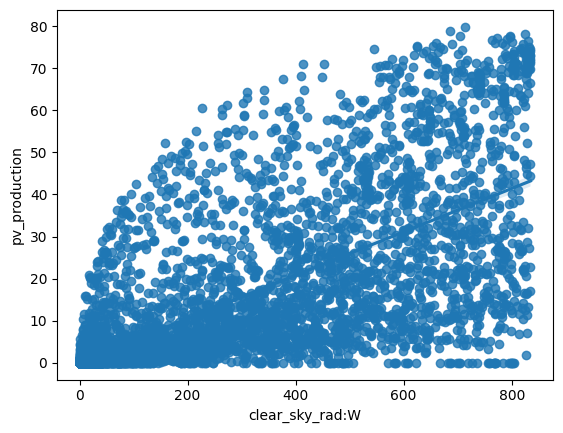

In [24]:
sns.regplot(data, x = data['clear_sky_rad:W'], y = data['pv_production'])

<Axes: >

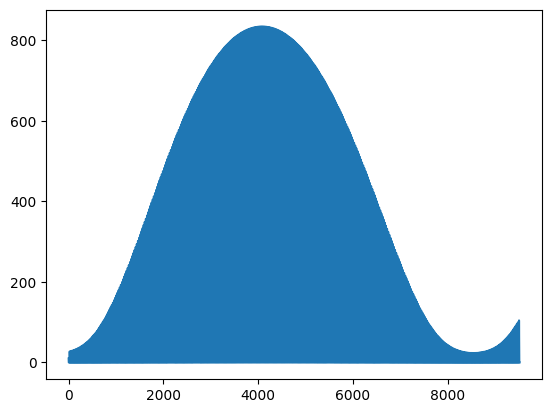

In [10]:
data['clear_sky_rad:W'].plot()

<Axes: xlabel='clear_sky_rad:W', ylabel='Count'>

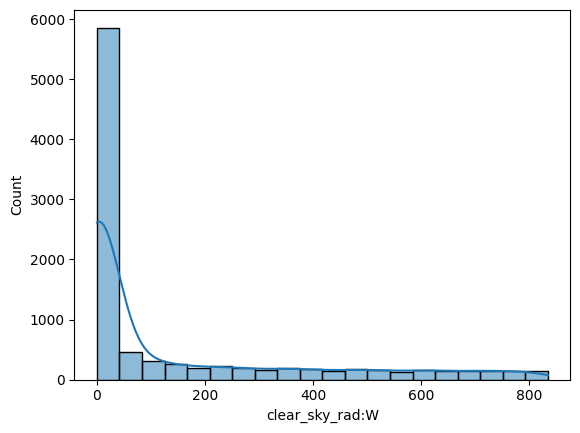

In [11]:
sns.histplot(data['clear_sky_rad:W'], bins = 20, kde=True)

<Axes: xlabel='clear_sky_rad:W'>

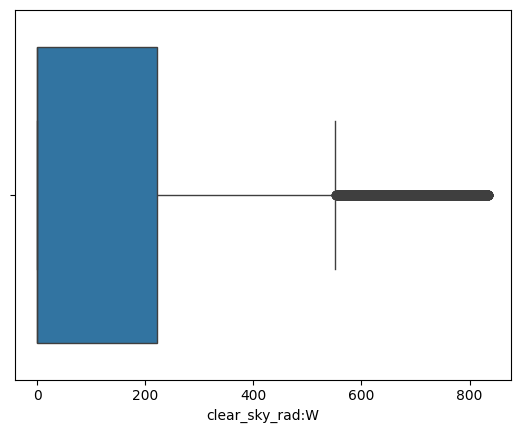

In [12]:
sns.boxplot(data, x = data['clear_sky_rad:W'])

In [13]:
eps = 1e-5
data['clear_sky_rad:W']= np.log(data['clear_sky_rad:W'] + eps)

<Axes: xlabel='clear_sky_rad:W', ylabel='Count'>

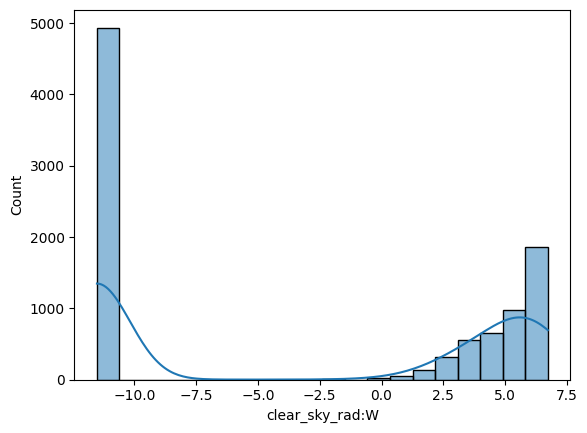

In [14]:
sns.histplot(data['clear_sky_rad:W'], bins = 20, kde=True)

<Axes: xlabel='clear_sky_rad:W'>

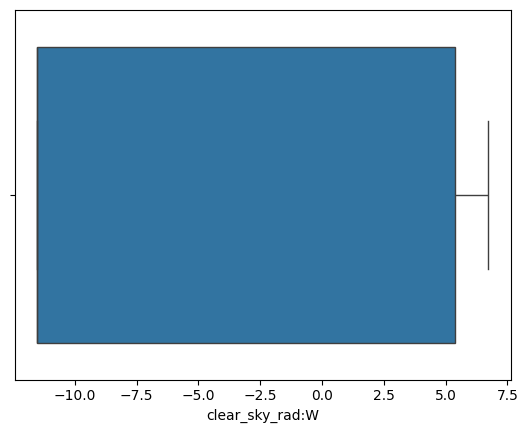

In [15]:
sns.boxplot(data, x = data['clear_sky_rad:W'])

<Axes: >

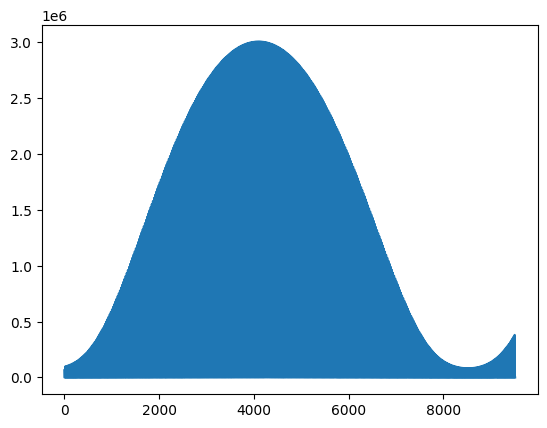

In [30]:
data['clear_sky_energy_1h:J'].plot()

<Axes: xlabel='clear_sky_energy_1h:J', ylabel='Count'>

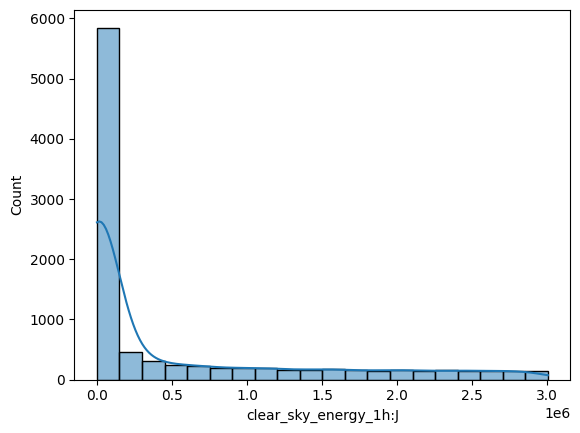

In [28]:
sns.histplot(data['clear_sky_energy_1h:J'], bins = 20, kde=True)

In [29]:
data['clear_sky_energy_1h:J'].describe()

count    9.515000e+03
mean     5.213013e+05
std      8.366789e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.637200e+03
75%      7.768631e+05
max      3.004661e+06
Name: clear_sky_energy_1h:J, dtype: float64

In [31]:
eps = 1e-5
data['clear_sky_energy_1h:J']= np.log(data['clear_sky_energy_1h:J'] + eps)

<Axes: xlabel='clear_sky_energy_1h:J', ylabel='Count'>

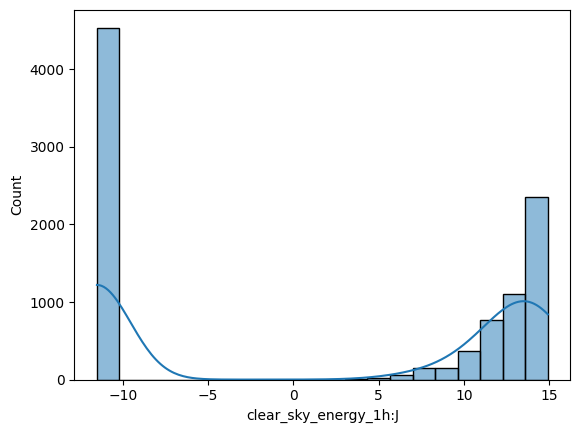

In [32]:
sns.histplot(data['clear_sky_energy_1h:J'], bins = 20, kde=True)

<Axes: xlabel='clear_sky_energy_1h:J'>

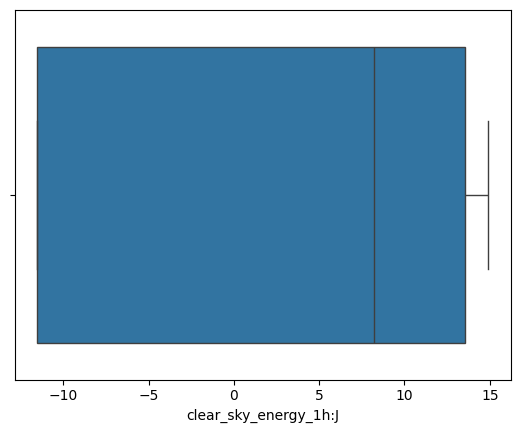

In [33]:
sns.boxplot(data, x = data['clear_sky_energy_1h:J'])

In [36]:
data['diffuse_rad:W']

0       7.4
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9510    0.0
9511    0.0
9512    0.0
9513    0.0
9514    0.0
Name: diffuse_rad:W, Length: 9515, dtype: float64

<Axes: >

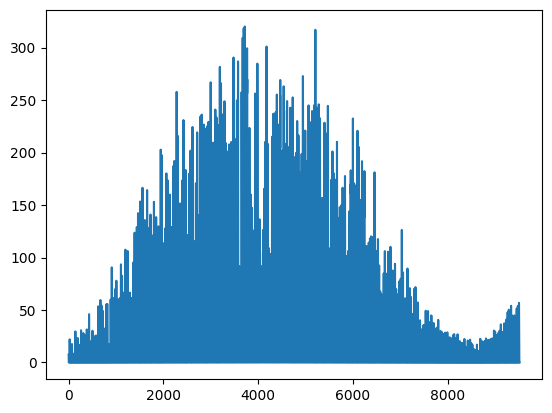

In [40]:
data['diffuse_rad:W'].plot()

<Axes: >

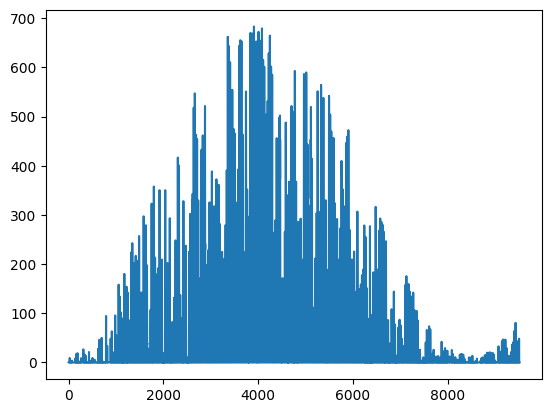

In [41]:
data['direct_rad:W'].plot()

<Axes: >

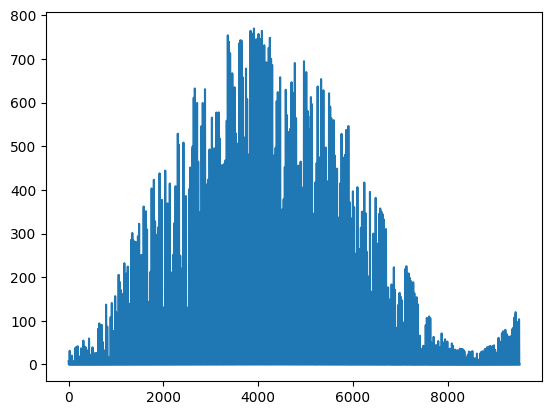

In [42]:
data['global_rad:W'].plot()

<Axes: xlabel='diffuse_rad:W', ylabel='Count'>

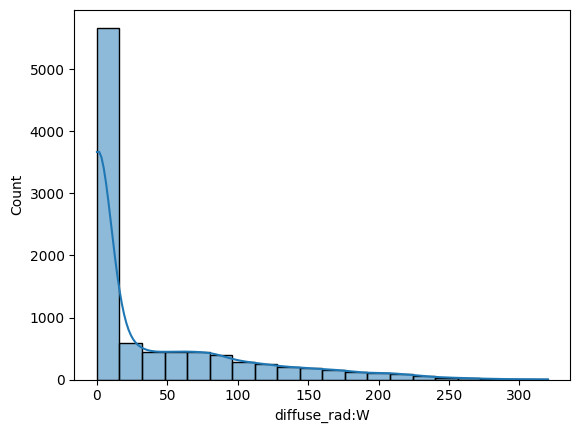

In [44]:
sns.histplot(data['diffuse_rad:W'], bins = 20, kde=True)

<Axes: xlabel='direct_rad:W', ylabel='Count'>

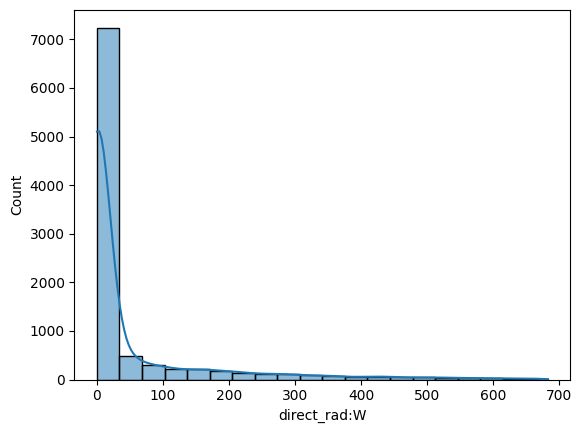

In [45]:
sns.histplot(data['direct_rad:W'], bins = 20, kde=True)

<Axes: xlabel='global_rad:W', ylabel='Count'>

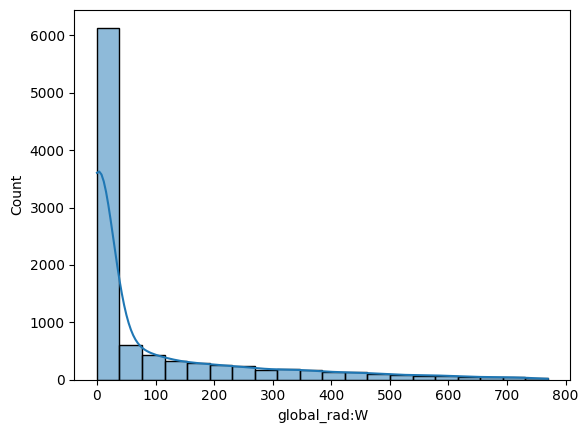

In [46]:
sns.histplot(data['global_rad:W'], bins = 20, kde=True)

<Axes: xlabel='diffuse_rad:W', ylabel='Count'>

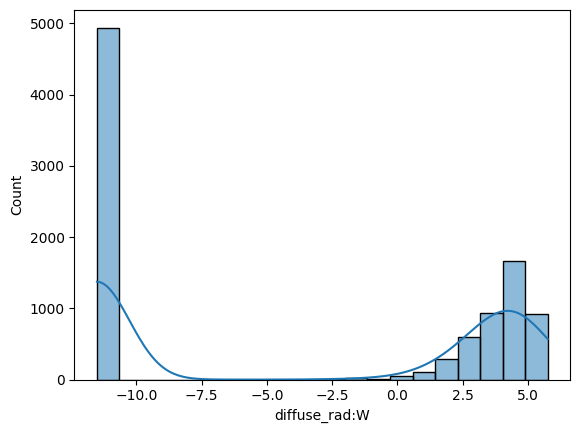

In [52]:
eps = 1e-5
sns.histplot(np.log(data['diffuse_rad:W'] + eps), bins = 20, kde=True)

<Axes: xlabel='clear_sky_rad:W'>

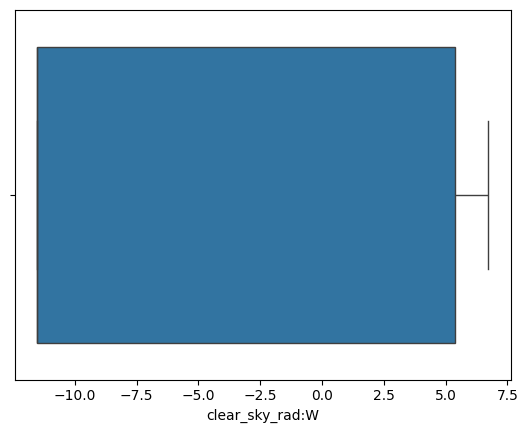

In [48]:
sns.boxplot(data, x = np.log(data['clear_sky_rad:W'] + eps))

<Axes: xlabel='clear_sky_rad:W'>

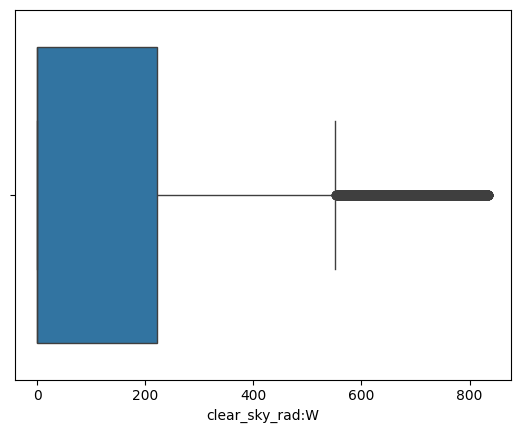

In [49]:
sns.boxplot(data, x = data['clear_sky_rad:W'])

<Axes: >

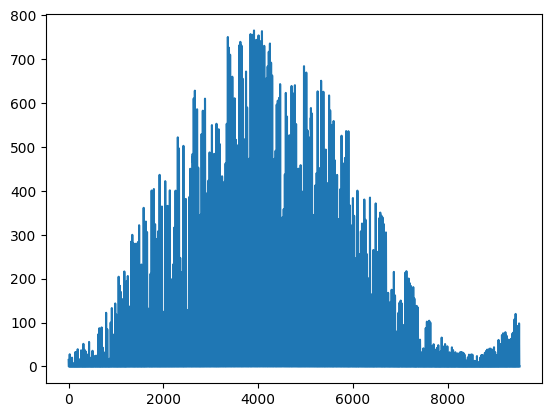

In [55]:
data['global_rad_1h:Wh'].plot()

# Next topic